<a href="https://colab.research.google.com/github/BNLCSISMR/Smoking-Obesity-Project/blob/main/%5BFINAL%5D_TreeBased_SMOKER_SelectionSmokingTumorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GEOparse



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 278 kB 16.6 MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29065 sha256=ff43a8eebb6f07a7974fd21fab4865b2d6d8cae323697e25a918cb9bcd09892c
  Stored in directory: /root/.cache/pip/wheels/4d/15/e8/fbf3b47444215d9728c20d7b35436b50086aa67c2ad6dcedad
Successfully built GEOparse


In [2]:
a = 2
a = 4
myList = [1, 2]
#use different names in the for loops

for a in myList:
  print(a)

print(a)

1
2
2


In [3]:
import GEOparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline



gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")


14-Aug-2022 02:29:12 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
14-Aug-2022 02:29:12 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
100%|██████████| 69.4M/69.4M [00:00<00:00, 84.8MB/s]
14-Aug-2022 02:29:13 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
14-Aug-2022 02:29:13 DEBUG downloader - Moving /tmp/tmp3rpiq9jq to /content/GSE46699_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmp3rpiq9jq to /content/GSE46699_family.soft.gz
14-Aug-2022 02:29:13 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46

In [4]:
import pandas as pd
import torch


In [5]:

print()
print("GSM example:")

for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         print(value[1])
         print(value[2])
         print(value[3])
    #print ("Table data:",)
    #print (gsm.table.head())
    

print()

#print("GPL example:")
#for gpl_name, gpl in gse.gpls.items():
 #   print("Name: ", gpl_name)
  #  print("Metadata:",)
   # for key, value in gpl.metadata.items():
    #    print(" - %s : %s" % (key, ", ".join(value)))
    #print("Table data:",)
    #print(gpl.table.head())
    #break


GSM example:
Name:  GSM1134764
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134765
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134766
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134767
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134768
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134769
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134770
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134771
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134772
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134773
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134774
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134775
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134776
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134777
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134778
Metadata:
tissue: normal
smoking: yes
obese: yes
Name:  GSM

Printing the name, head, and items

Create a merged table of the first gsm table we have. Print the head and test out accessing one column

In [6]:
mergedTable = gsm.table
entry = mergedTable["VALUE"]

Iterate through all of the tables and add the values column to the end of the mergedTable

In [7]:
for gsm_name, gsm in gse.gsms.items():
    entry = gsm.table["VALUE"]
    mergedTable.insert(1, gsm_name, value=entry, allow_duplicates=True)
    ##mergedTable = mergedTable.assign(gsm_name = entry)

    ##gsm.table = pd.merge(mergedTable, gsm.table, how = 'inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


Print mergedTable

drop the last column as it is a duplicate

In [8]:
mergedTable = mergedTable.iloc[: , :-1]

Transpose the table to make ID_REF the index

In [9]:
newMergeTable = mergedTable.transpose()

In [10]:
newMergeTable = newMergeTable.rename(columns=newMergeTable.iloc[0])
newMergeTable = newMergeTable.iloc[1: , :]

In [11]:
tissueList = []
tissue_label = []
smokingList = []
smoking_label = []
obesityList = []
obesity_label = []
for gsm_name, gsm in gse.gsms.items():
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         substringOne = 'tumor'
         substringTwo = 'yes'
         substringThree = 'yes'
         
         ##Appending all the values to tissue list if its a tumor or not (tumor = 1 normal = 0)
         if substringOne in value[1]:
           tissueList.append(1)
           tissue_label.append('tumor')
         else:
           tissueList.append(0)
           tissue_label.append('normal')
         
         ##Appending all teh values to the smoking list(smoker=1 non-smoker = 0)
         if substringTwo in value[2]:
           smokingList.append(1)
           smoking_label.append('yes')
         else:
           smokingList.append(0)
           smoking_label.append('no')

        ##Appending all teh values to the obesity list(obese = 1 not obese = 0)
         if substringThree in value[3]:
           obesityList.append(1)
           obesity_label.append('yes')
         else:
           obesityList.append(0)
           obesity_label.append('no')
  
print(tissueList)
print(tissue_label)

print(smokingList)
print(smoking_label)

print(obesityList)
print(obesity_label)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
['normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 

Creating a labels dataframe

In [12]:
#class_labels = pd.DataFrame()

#class_labels['Tissue'] = tissueList
#class_labels['Smoker'] = smokingList
#class_labels['Obesity'] = obesityList
print(newMergeTable)
#print(class_labels)
newMergeTable.shape

            1007_s_at   1053_at    117_at     121_at 1255_g_at   1294_at  \
GSM1304423  10.465147  5.131448  6.003662  11.353257  3.580513  7.227263   
GSM1304422   10.69537  6.117586  6.233694  11.162211  3.420228  7.583564   
GSM1304421   9.785637  4.844387  5.841087  11.198888  3.461025  7.071538   
GSM1304420  10.023791  6.786107  6.438581   9.745609  3.431811  7.204418   
GSM1134889    8.99498  5.530289  5.672777   9.624678  4.034493  6.979319   
...               ...       ...       ...        ...       ...       ...   
GSM1134768  10.106417  4.827499  5.668851  11.194256   3.47619  7.254072   
GSM1134767  10.735899  6.154403  6.539063  10.490871  3.499183  7.313254   
GSM1134766   9.919435  4.628159  5.636217  11.073223  3.479632  7.034347   
GSM1134765   9.812106  5.776783  6.422235  11.142645  3.524682  7.052937   
GSM1134764  10.654552  5.104113  5.372776  11.908765  3.500414  7.154525   

             1316_at   1320_at 1405_i_at   1431_at  ... AFFX-r2-Ec-bioD-3_at  \
GSM1304

(130, 54675)

Using tree based feature selection to get importance scores

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(newMergeTable, tissueList)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
newMergeTableTwo = model.transform(newMergeTable)


importance_List = []




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


creating a list of all importance scores

In [14]:
for i,v in enumerate(importances):
	importance_List.append(v)
print(importance_List)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048130815721434095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005993200023050775, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000564637131801311, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

sorting all the scores descending

In [15]:
sortedImportance_List = sorted(importance_List, reverse=True)
print(sortedImportance_List)

len(importance_List)


[0.002564453952912396, 0.002515201768933112, 0.0023180856428411754, 0.0023054566181039075, 0.002240879795401345, 0.00221128083987699, 0.0021558419942022135, 0.002102613590336267, 0.0020954801338596667, 0.0020515595319963876, 0.0020199753114128606, 0.0019963955731546346, 0.001991391149516188, 0.001990094451372968, 0.0019608945315814693, 0.0019402985074626867, 0.0019340937577233446, 0.00192972362201405, 0.0018595115419109015, 0.0018415212566903108, 0.0018149512179362899, 0.00180608706856188, 0.0017584215345409367, 0.0017442050609546434, 0.0017378854774004612, 0.0017290323653245882, 0.0017229867976136634, 0.001717312132149709, 0.0017130563399220108, 0.0017104951433309643, 0.0016942047133944775, 0.0016895116255457407, 0.00168951162554574, 0.001679104477611939, 0.001671740197404559, 0.001671010029218985, 0.0016631130063965885, 0.0016519085745534134, 0.0016499136968220116, 0.0016384796724738216, 0.0016265547858336912, 0.0016169154228855723, 0.0016040962678906987, 0.0016040962678906983, 0.001

54675

concrete example to help

In [16]:
a = [45, 17, 19, 20]
b = [17, 19, 20, 45]
c = []
for i in b:
  c.append(a.index(i))
print(c)

[1, 2, 3, 0]


Gets the index of the sorted features scores and adds them to list

In [17]:
from sklearn.preprocessing import scale
from sklearn import decomposition
print("FEATURE IMPORTANCES", importance_List)
print("FEATURE IMPORTANCES(SORTED)", sortedImportance_List)
importance_indices = []

for i in sortedImportance_List:
  importance_indices.append(importance_List.index(i))

print("INDICES",importance_indices)

FEATURE IMPORTANCES [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048130815721434095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005993200023050775, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000564637131801311, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Check if the code worked

In [18]:
print(importance_List[12704])

0.0


In [19]:
x = []
for i in range(54675):
  x.append(i)

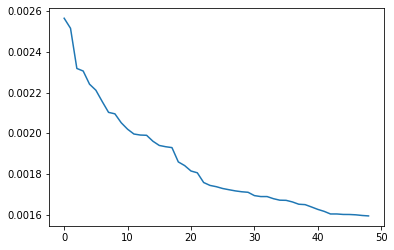

In [20]:
plt.plot(x[0:49], sortedImportance_List[0:49])
plt.show()

In [21]:
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'],
        'Height': [5.1, 6.2, 5.1, 5.2],
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']}
  
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)
print(df)
print()
print(df.iloc[:,1])

     Name  Height Qualification
0     Jai     5.1           Msc
1  Princi     6.2            MA
2  Gaurav     5.1           Msc
3    Anuj     5.2           Msc

0    5.1
1    6.2
2    5.1
3    5.2
Name: Height, dtype: float64


Now time to create a new table of only the most important features

In [22]:
finalMergeTable = pd.DataFrame()

#number of iterations based on how many features may be changed based on how many create a good PCA plot
for i in range (5):
  targetColumn = newMergeTable.iloc[:,importance_indices[i]]
  finalMergeTable.insert(len(finalMergeTable.columns), i, targetColumn)

print(finalMergeTable)


                   0         1         2          3         4
GSM1304423  6.471233  6.622125  6.329238   10.13866  4.415073
GSM1304422  6.778082  6.349226  5.967493   9.419873  4.384309
GSM1304421  6.030845  6.813531  6.764858   9.657973  4.327733
GSM1304420  5.930291  6.400419  5.722485   9.697899  4.475517
GSM1134889  5.084997  5.969153  4.697861   8.210178   4.33215
...              ...       ...       ...        ...       ...
GSM1134768  5.635556  6.092521  6.069747    9.76797  4.257093
GSM1134767  5.430603  6.435548  5.569131   9.875369  4.789708
GSM1134766  5.936476  6.206127  6.315991   9.891233  4.568997
GSM1134765  5.620425  6.414885  5.455065   9.369194  4.486334
GSM1134764  6.064017  6.610934   5.92583  10.018877  4.629284

[130 rows x 5 columns]


In [23]:
pca = decomposition.PCA(n_components=4)
pca.fit(finalMergeTable)



PCA(n_components=4)

In [24]:
scores = pca.transform(finalMergeTable)

In [25]:
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
scores_df

,PC1,PC2,PC3,PC4
0,-0.915132,0.308903,-0.182546,0.389432
1,-0.243976,0.296510,-0.055909,0.976669
2,-0.479556,0.784318,-0.415693,-0.044851
3,-0.148641,-0.175765,0.029567,0.193892
4,1.795648,-0.711402,0.314273,0.096692
...,...,...,...,...
125,-0.173970,0.114825,0.364951,-0.164240
126,-0.104077,-0.485442,0.077147,-0.248436
127,-0.466802,0.318265,0.237898,0.027282
128,0.320942,-0.365900,-0.002079,0.059262


In [26]:
import plotly.express as px

In [27]:
# Label to color dict (manual)
label_color_dict_tissue = {'tumor':'red','normal':'green'}
label_color_dict_obesity = {'yes': 'red', 'no': 'green'}
label_color_dict_smoker = {'yes': 'red', 'no': 'green'}

# Color vector creation
cvec_tissue = [label_color_dict_tissue[label] for label in tissue_label]
cvec_obesity = [label_color_dict_obesity[label] for label in obesity_label]
cvec_smoker = [label_color_dict_smoker[label] for label in smoking_label]

shape_tissue = []
for i in cvec_tissue:
  if(i=='green'):
    shape_tissue.append('normal')
  else:
    shape_tissue.append('tumor')

new_shape_tissue=pd.DataFrame()
new_shape_tissue['marker'] = shape_tissue

In [28]:
print(cvec_tissue)
print(shape_tissue)
print(new_shape_tissue)

['green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'red', 'r

In [29]:
#plt.figure(figsize=(8,8))
#for marker in shape_tissue:
#  plt.scatter(scores[:,0], scores[:,2],
#              c=cvec_tissue, edgecolor='', alpha=0.5, marker = marker)
#plt.xlabel('PC 1')
#plt.ylabel('PC 3')
#plt.show()

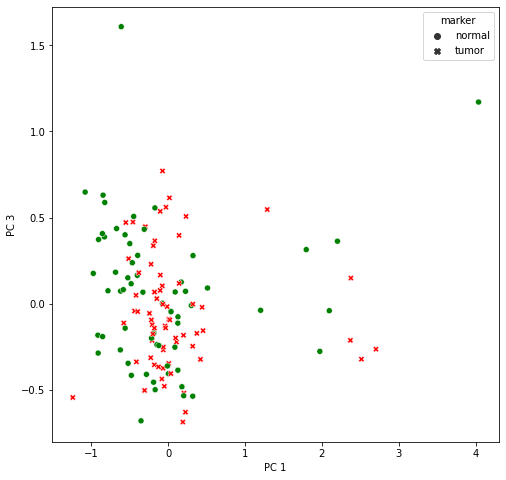

In [30]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.scatterplot(x=scores[:,0], y=scores[:,2], c=cvec_tissue, style=new_shape_tissue['marker'])
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.show()

In [31]:
tissueList

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0]

In [32]:
tissue_label

['normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'n

In [33]:
labels = pd.DataFrame(tissue_label)
labels

,0
0,normal
1,tumor
2,normal
3,tumor
4,normal
...,...
125,tumor
126,tumor
127,normal
128,tumor


In [34]:
finalMergeTable['Tissue'] = tissueList
finalMergeTable

,0,1,2,3,4,Tissue
GSM1304423,6.471233,6.622125,6.329238,10.13866,4.415073,0
GSM1304422,6.778082,6.349226,5.967493,9.419873,4.384309,1
GSM1304421,6.030845,6.813531,6.764858,9.657973,4.327733,0
GSM1304420,5.930291,6.400419,5.722485,9.697899,4.475517,1
GSM1134889,5.084997,5.969153,4.697861,8.210178,4.33215,0
...,...,...,...,...,...,...
GSM1134768,5.635556,6.092521,6.069747,9.76797,4.257093,1
GSM1134767,5.430603,6.435548,5.569131,9.875369,4.789708,1
GSM1134766,5.936476,6.206127,6.315991,9.891233,4.568997,0
GSM1134765,5.620425,6.414885,5.455065,9.369194,4.486334,1


In [35]:
#trying to make the objects into floats
finalMergeTable.iloc[:, 0] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 1] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 2] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 3] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 4] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable['Tissue'] = finalMergeTable['Tissue'].astype(float, errors = 'raise')

finalMergeTable.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
Tissue    float64
dtype: object

In [36]:
finalMergeTable

,0,1,2,3,4,Tissue
GSM1304423,6.471233,6.471233,6.471233,6.471233,6.471233,0.0
GSM1304422,6.778082,6.778082,6.778082,6.778082,6.778082,1.0
GSM1304421,6.030845,6.030845,6.030845,6.030845,6.030845,0.0
GSM1304420,5.930291,5.930291,5.930291,5.930291,5.930291,1.0
GSM1134889,5.084997,5.084997,5.084997,5.084997,5.084997,0.0
...,...,...,...,...,...,...
GSM1134768,5.635556,5.635556,5.635556,5.635556,5.635556,1.0
GSM1134767,5.430603,5.430603,5.430603,5.430603,5.430603,1.0
GSM1134766,5.936476,5.936476,5.936476,5.936476,5.936476,0.0
GSM1134765,5.620425,5.620425,5.620425,5.620425,5.620425,1.0


In [37]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

var_colums = [c for c in finalMergeTable.columns if c not in ['Tissue']]
X = finalMergeTable.loc[:, var_colums]
y = finalMergeTable.loc[:, 'Tissue']



X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [38]:
X.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
dtype: object

In [39]:
print(X)

                   0         1         2         3         4
GSM1304423  6.471233  6.471233  6.471233  6.471233  6.471233
GSM1304422  6.778082  6.778082  6.778082  6.778082  6.778082
GSM1304421  6.030845  6.030845  6.030845  6.030845  6.030845
GSM1304420  5.930291  5.930291  5.930291  5.930291  5.930291
GSM1134889  5.084997  5.084997  5.084997  5.084997  5.084997
...              ...       ...       ...       ...       ...
GSM1134768  5.635556  5.635556  5.635556  5.635556  5.635556
GSM1134767  5.430603  5.430603  5.430603  5.430603  5.430603
GSM1134766  5.936476  5.936476  5.936476  5.936476  5.936476
GSM1134765  5.620425  5.620425  5.620425  5.620425  5.620425
GSM1134764  6.064017  6.064017  6.064017  6.064017  6.064017

[130 rows x 5 columns]


In [40]:
print(y)

GSM1304423    0.0
GSM1304422    1.0
GSM1304421    0.0
GSM1304420    1.0
GSM1134889    0.0
             ... 
GSM1134768    1.0
GSM1134767    1.0
GSM1134766    0.0
GSM1134765    1.0
GSM1134764    0.0
Name: Tissue, Length: 130, dtype: float64


Building and fitting model

In [41]:
#model = XGBClassifier()
#model.fit(X_train, y_train)

model_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                     n_estimators=5000,
                                     subsample=0.5,
                                     colsample_bytree=0.5,
                                     eval_metric='auc',
                                     verbosity=1, 
                                      enable_categorical=True)

eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.482143
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.526786
[2]	validation_0-auc:0.550595
[3]	validation_0-auc:0.610119
[4]	validation_0-auc:0.630952
[5]	validation_0-auc:0.630952
[6]	validation_0-auc:0.654762
[7]	validation_0-auc:0.654762
[8]	validation_0-auc:0.610119
[9]	validation_0-auc:0.622024
[10]	validation_0-auc:0.651786
[11]	validation_0-auc:0.616071
[12]	validation_0-auc:0.633929
[13]	validation_0-auc:0.651786
[14]	validation_0-auc:0.639881
[15]	validation_0-auc:0.645833
[16]	validation_0-auc:0.639881
Stopping. Best iteration:
[6]	validation_0-auc:0.654762



XGBClassifier(colsample_bytree=0.5, enable_categorical=True, eval_metric='auc',
              max_depth=5, n_estimators=5000, subsample=0.5)

Evaluating Model Performance (AUC)


In [42]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.7414
AUC Valid: 0.6548


Hyperparamter Fine-Tuning

In [44]:
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 3000]}

Now let us pass this to GridSearchCV. We have a custom scoring function based on sklearn's roc_auc_score() which calculated area under the curve. CV value is 2, which is not ideal but we want to minimize the execution time

In [45]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.938, test=0.579) total time=   0.2s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.912, test=0.530) total time=   0.1s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.962, test=0.552) total time=   0.2s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.959, test=0.542) total time=   0.2s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.972, test=0.552) total time=   0.3s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.975, test=0.521) total time=   0.3s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.946, test=0.576) total time=   0.1s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.938, test=0.529) total time=   0.1s
[CV

GridSearchCV(cv=2,
             estimator=XGBClassifier(colsample_bytree=0.25, eval_metric='auc',
                                     subsample=0.5, use_label_encoder=False),
             param_grid={'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1000, 2000, 3000]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7f7bdebe4680>, verbose=4)

Let us look at the output of grid search step. We will retain only a few relevant columns and sort based on rank_test_score i.ee the performance on validation data

In [46]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
0,1,0.554242,0.925368,0.02,2,1000
3,2,0.552821,0.942184,0.02,3,1000
1,3,0.547152,0.960428,0.02,2,2000
6,4,0.546658,0.948341,0.02,5,1000
4,5,0.546201,0.967771,0.02,3,2000
7,6,0.545729,0.967771,0.02,5,2000
2,7,0.536479,0.973221,0.02,2,3000
9,8,0.535280,0.965875,0.05,2,1000
5,9,0.535055,0.978195,0.02,3,3000
8,10,0.529374,0.981037,0.02,5,3000


Graph model performance in terms of number of trees and depth of tree

Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

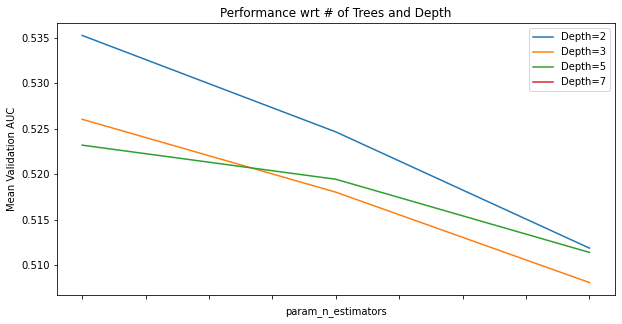

In [47]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Find out best learning rate by graphing with fixed n_estimators to 3000 and fixed depth to 2

Text(0.5, 1.0, 'Performance wrt learning rate')

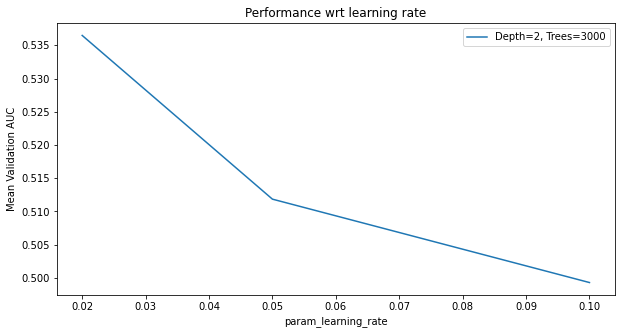

In [48]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & (df_cv_results['param_max_depth']==2),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

Final Model after hyperparameter tuning

In [49]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.02,
                                          max_depth=2,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.597114	validation_1-auc:0.607143
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.63707	validation_1-auc:0.622024
[2]	validation_0-auc:0.655383	validation_1-auc:0.619048
[3]	validation_0-auc:0.651313	validation_1-auc:0.64881
[4]	validation_0-auc:0.656493	validation_1-auc:0.627976
[5]	validation_0-auc:0.660747	validation_1-auc:0.616071
[6]	validation_0-auc:0.669811	validation_1-auc:0.651786
[7]	validation_0-auc:0.664632	validation_1-auc:0.651786
[8]	validation_0-auc:0.677765	validation_1-auc:0.651786
[9]	validation_0-auc:0.675916	validation_1-auc:0.645833
[10]	validation_0-auc:0.685905	validation_1-auc:0.651786
[11]	validation_0-auc:0.674621	validation_1-auc:0.616071
[12]	validation_0-auc:0.671476	validation_1-auc:0.651786
[13]	validation_0-auc:0.671846	validation_1-auc:0.651786
[14]	validation_0-auc:0.666112	validation_1-auc:0.660714


XGBClassifier(colsample_bytree=0.25, eval_metric='auc', learning_rate=0.02,
              max_depth=2, n_estimators=5000, subsample=0.5,
              use_label_encoder=False)

Calculate AUC value for training and validation sets



In [50]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.7260
AUC Valid: 0.7470


Graph AUC

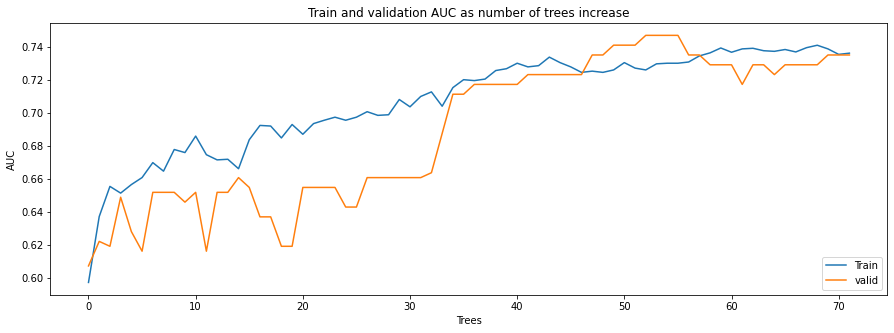

In [51]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()